In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#data read
data=pd.read_csv("/content/drive/MyDrive/CSV/Example (1) (1).csv",encoding='latin1')
data

,Text,lable,Clean Dataset
0,`- This is not ``creative``. Those are the di...,1.0,this creative those dictionary definitions ter...
1,` :: the term ``standard model`` is itself le...,0.0,term standard model less npov think wed prefer...
2,"True or false, the situation as of March 200...",0.0,true false situation march saudi proposal land...
3,"Next, maybe you could work on being less cond...",1.0,next maybe could work less condescending sugge...
4,This page will need disambiguation.,0.0,this page need disambiguation
...,...,...,...
4995,NaN,NaN,most repetitive nonsense anyway ill back days ...
4996,NaN,NaN,happy helped consult holroyds book anything re...
4997,NaN,NaN,autoradiograph image restored please insert ap...
4998,NaN,NaN,would inclined would think internal link fox n...


In [ ]:
#data shape
data.shape

(5000, 3)

**sample 40000 data**

In [ ]:
sample_data = data.sample(4000,replace=True, random_state=1)
X = sample_data['Text']
y = sample_data['lable']
print(X)
print(y)

235       == Parentage and children ==  I see this was...
3980      Wow, that's like six-million times better th...
905     `  It seems to me, to use a Christian metaphor...
2763    `   Sooooo... Does any OTHER admin want to com...
2895      ==  English versions ==  There is not need t...
                              ...                        
1724      ::The previous format of the page provides a...
4037     April 2006 (UTC)  ::: You allopaths took it u...
4182      I told you he was notable, medical men who b...
2318    Welcome!  Hello, , and welcome to Wikipedia! T...
271     `  :It's so easy you could do it yourself if y...
Name: Text, Length: 4000, dtype: object
235     0.0
3980    0.0
905     1.0
2763    1.0
2895    1.0
       ... 
1724    0.0
4037    1.0
4182    0.0
2318    1.0
271     1.0
Name: lable, Length: 4000, dtype: float64


In [ ]:
#select first 4000 rows
data = data.iloc[:4000,:]
#count unique value  label

data['lable'].value_counts()

,count
lable,
1.0,2406
0.0,1594


<Axes: xlabel='lable'>

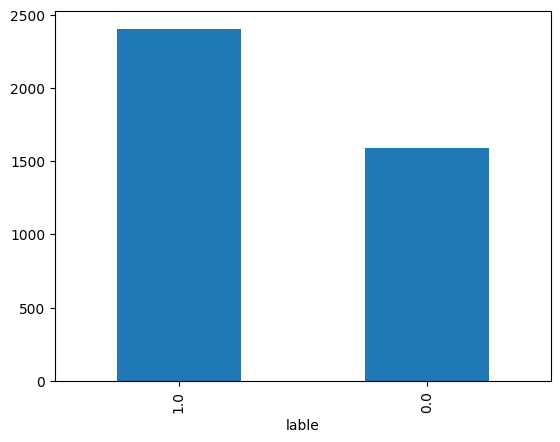

In [ ]:
#visualize label
data['lable'].value_counts().plot(kind='bar')

**creating a pie char**

Text(0.5, 1.0, 'label distribution')

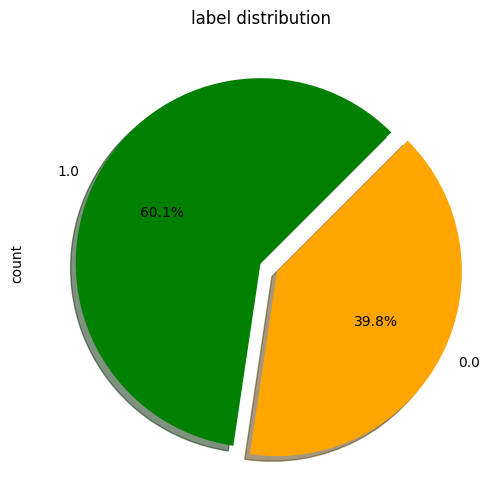

In [ ]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['lable'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

**visualizing the negative and positive words**

In [ ]:
data['Clean Dataset'][1000]


'response would like jtkiefer show edited page freplyspang also like know considered vandalism tagging user pages imdaking unike chriss obvious sock puppets jtkiefer even warned imdaking page would sockpuppeting continued use identities tagging jtkiefers page good faith heshe reverted tag knowing user sockpuppeting could assume person something stinks here folks dont think stupid enough see like answers people ryan sent several messages private email hope get substantive replies questions including attacked'

In [ ]:
print(data.columns)

Index(['Text', 'lable', 'Clean Dataset'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
features=sample_data.drop("lable",axis=1)
labels=sample_data["lable"]
print(features)
print(labels)
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size = 0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size = 0.20, random_state=42)

print("Data distribution:\n- Train: {} \n- Validation: {} \n- Test: {}".format(len(y_train),len(y_val),len(y_test)))


                                                   Text  \
235     == Parentage and children ==  I see this was...   
3980    Wow, that's like six-million times better th...   
905   `  It seems to me, to use a Christian metaphor...   
2763  `   Sooooo... Does any OTHER admin want to com...   
2895    ==  English versions ==  There is not need t...   
...                                                 ...   
1724    ::The previous format of the page provides a...   
4037   April 2006 (UTC)  ::: You allopaths took it u...   
4182    I told you he was notable, medical men who b...   
2318  Welcome!  Hello, , and welcome to Wikipedia! T...   
271   `  :It's so easy you could do it yourself if y...   

                                          Clean Dataset  
235   parentage children see discussed wanted try ge...  
3980  wow thats like sixmillion times better stub pu...  
905   seems use christian metaphor cast first stone ...  
2763  sooooo does other admin want come delete idea ...  
2

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2560, 2)
(2560,)


In [ ]:
#Trying
#Use TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize(data, tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    # Use 'get_feature_names_out()' instead of 'get_feature_names()'
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return X_tfidf_df


In [ ]:
#trying



tfidf_vect = TfidfVectorizer(analyzer=clean)
tfidf_vect_fit=tfidf_vect.fit(X_train['text'])
X_train=vectorize(X_train['text'],tfidf_vect_fit)



NameError: name 'clean' is not defined

In [ ]:
#trying

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf= RandomForestClassifier()
scores = cross_val_score(rf, X_train,y_train,cv=5)

ValueError: Found input variables with inconsistent numbers of samples: [4000, 2560]

**Use TfidfVectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # convert a collection of raw text documents into a matrix
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
# Extract the label values from the 'data' DataFrame and assign them to variable 'y'
#data['Text'] = data['Text'].fillna('')
y=data.lable.values
x=tfidf.fit_transform(data.Text)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
#cross-validation to select the best regularization parameter.
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min finished


In [ ]:
from sklearn import metrics


print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Train Accuracy:", metrics.accuracy_score(y_train, clf.predict(X_train)))


Test Accuracy: 0.6275
Train Accuracy: 0.595


**Random Forest Classifier**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Convert the text data into numerical features
vectorizer = CountVectorizer(strip_accents=None, lowercase=False, preprocessor=None)
X = vectorizer.fit_transform(data.Text)

# Step 2: Extract the label values
y = data.lable.values

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy* 100:.2f}%')


Accuracy: 57.12%
